
# Documentation

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [1]:
# !pip install numpy==2.2.0
# !pip install pandas==2.2.3
# !pip install scikit-learn==1.6.0
# !pip install matplotlib==3.9.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 4.3 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


## PREPROCESSING

https://scikit-learn.org/stable/api/sklearn.preprocessing.html#

In [6]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

### Standard Scaler

<!-- ![image.png]() -->

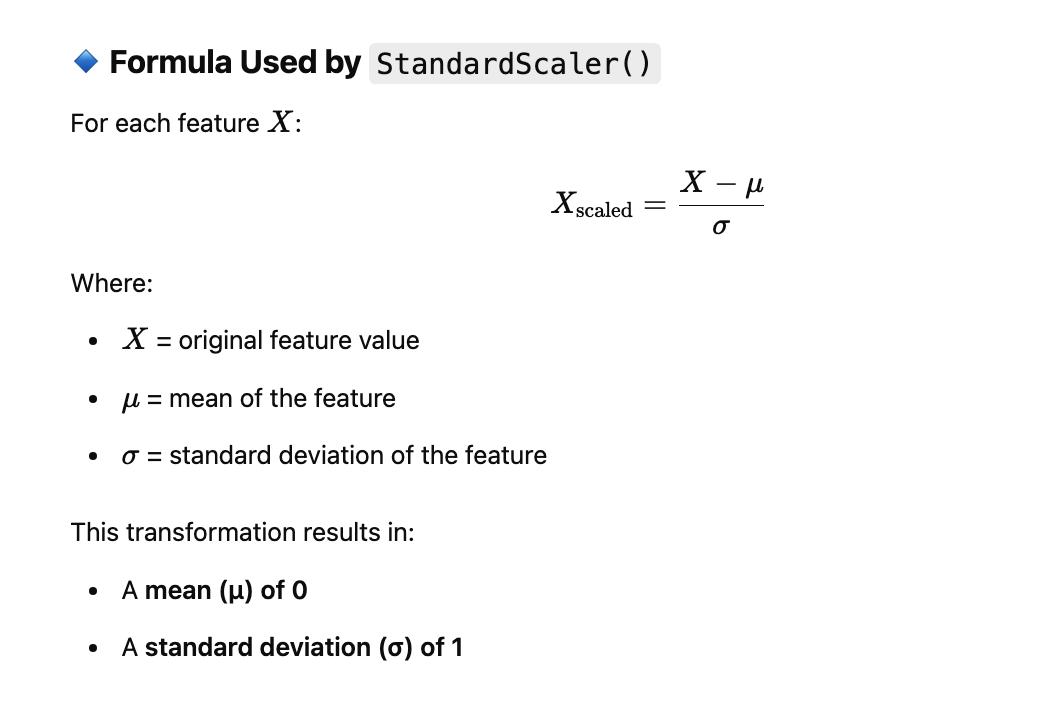


In [ ]:
# Standardizing continuous numerical features
continuous_columns = data.select_dtypes(include=['float64']).columns.tolist()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[continuous_columns])

# # Converting to a DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=scaler.get_feature_names_out())

# # Combining with the original dataset
scaled_data = pd.concat([data.drop(columns=continuous_columns), scaled_df], axis=1)

### One Hot Encoding 

In [ ]:
# Identifying categorical columns
categorical_columns = scaled_data.select_dtypes(include=['object']).columns.tolist()
categorical_columns.remove('NObeyesdad')  # Exclude target column

# Applying one-hot encoding
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = encoder.fit_transform(scaled_data[categorical_columns])

# Converting to a DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))

# Combining with the original dataset
prepped_data = pd.concat([scaled_data.drop(columns=categorical_columns), encoded_df], axis=1)

### Label Encoding

In [2]:
from sklearn.preprocessing import LabelEncoder

# Example categorical labels
y = ['cat', 'dog', 'fish', 'dog', 'cat', 'fish', 'cat']

# Initialize label encoder
label_encoder = LabelEncoder()

# Fit and transform labels
y_encoded = label_encoder.fit_transform(y)

print("Original labels:", y)
print("Encoded labels:", y_encoded)
print("Mapping:", dict(zip(label_encoder.classes_, range(len(label_encoder.classes_)))))


Original labels: ['cat', 'dog', 'fish', 'dog', 'cat', 'fish', 'cat']
Encoded labels: [0 1 2 1 0 2 0]
Mapping: {np.str_('cat'): 0, np.str_('dog'): 1, np.str_('fish'): 2}


### Normalize

#### Normalize | l1 Norm

<!-- ![image.png](){width=100px} -->

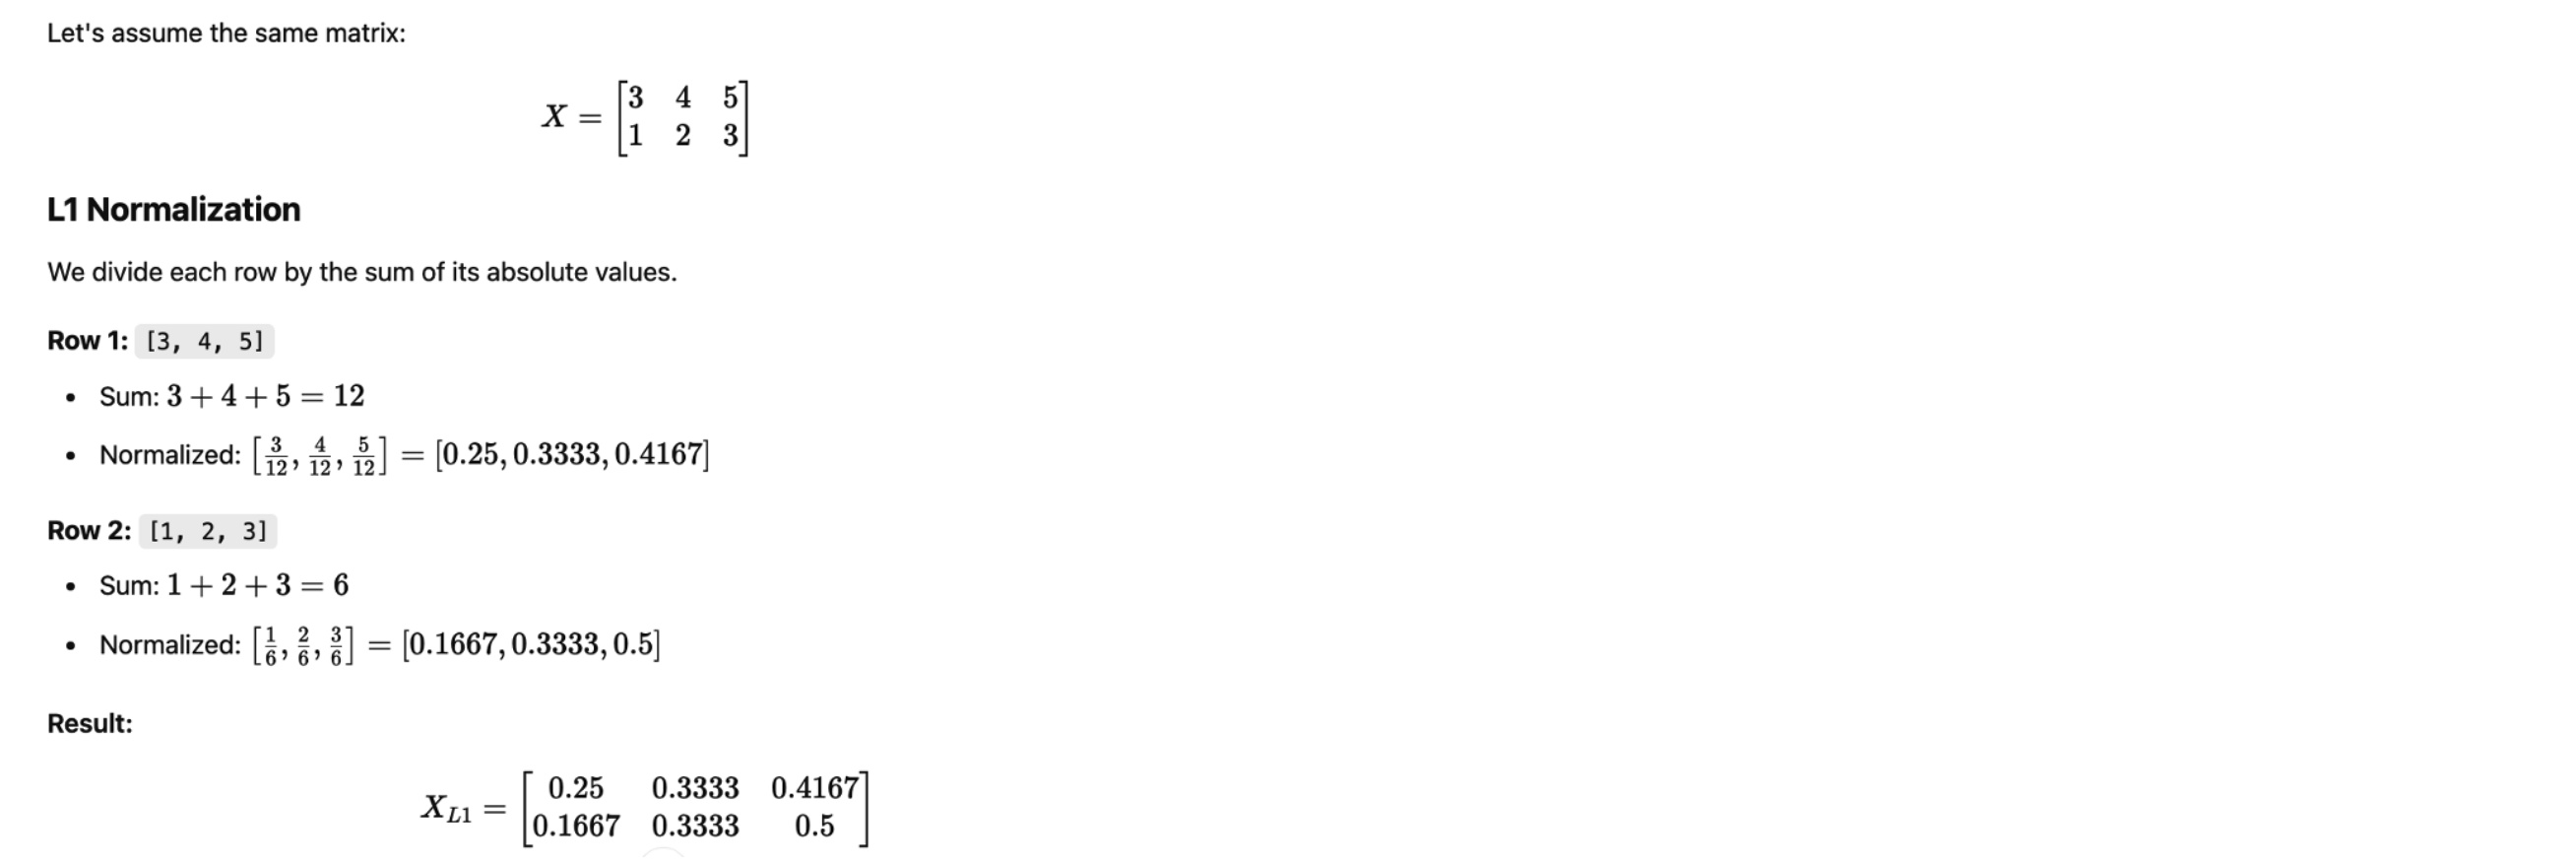


In [3]:
from sklearn.preprocessing import normalize


X = features.drop(columns=['tip_amount']).to_numpy()
X = normalize(X, axis=1, norm='l1', copy=False)



#### Normalize | l2 Norm

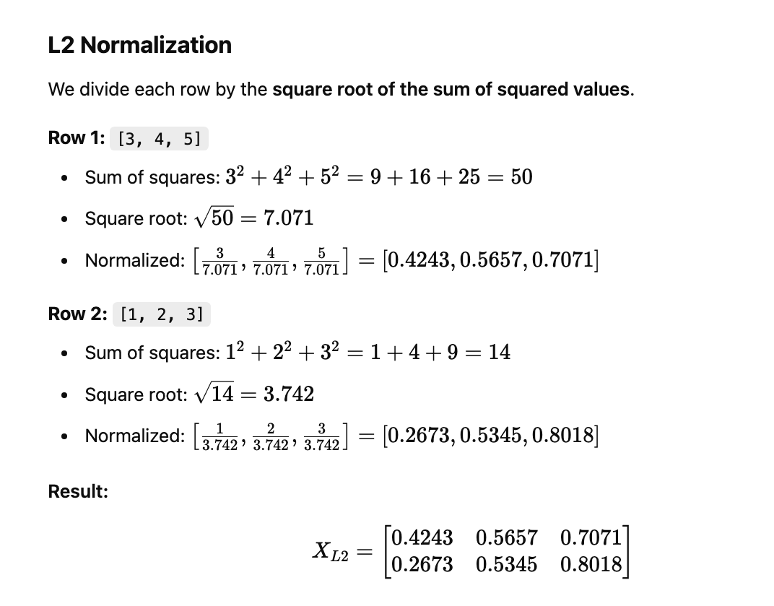

In [3]:
from sklearn.preprocessing import normalize
X = features.drop(columns=['tip_amount']).to_numpy()
X = normalize(X, axis=1, norm='l2', copy=False)



### Map parameters back to orginal space 

In [ ]:
# Get the standard scaler's mean and standard deviation parameters
means_ = std_scaler.mean_
std_devs_ = np.sqrt(std_scaler.var_)

# The least squares parameters can be calculated relative to the original, unstandardized feature space as:
coef_original = coef_ / std_devs_
intercept_original = intercept_ - np.sum((means_ * coef_) / std_devs_)

print ('Coefficients: ', coef_original)
print ('Intercept: ', intercept_original)

## MODEL SELECTION

https://scikit-learn.org/stable/api/sklearn.model_selection.html

#### train_test_split: A function from sklearn.model_selection that splits data into training and testing sets.
- X: Features (independent variables).
- y: Target labels (dependent variable).
- test_size=0.2: 20% of the data is allocated to the test set, and 80% to the training set.
- random_state=42: Ensures reproducibility of results (same split every time).
- stratify=y: Ensures that the proportion of classes in the train and test sets remains the same as in the original dataset.

#### Why Use stratify=y?
* Helps prevent class imbalance in the train/test split.
* Ensures fair representation of all classes in both sets.
* Particularly useful when dealing with imbalanced datasets (e.g., fraud detection, rare diseases).

In [2]:
from sklearn.model_selection import train_test_split 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## LINEAR MODELS

https://scikit-learn.org/stable/api/sklearn.linear_model.html

### Linear Regression ( Simple and Multiple )

In [4]:
from sklearn.linear_model import LinearRegression
regressor.fit(X_train.reshape(-1, 1), y_train)
print ('Coefficients: ', regressor.coef_[0]) # with simple linear regression there is only one coefficient, here we extract it from the 1 by 1 array.
print ('Intercept: ',regressor.intercept_)
y_test_ = regressor.predict( X_test.reshape(-1,1))

### Logistic Regression with One-vs-All
In the One-vs-All approach:

* The algorithm trains a single binary classifier for each class.
* Each classifier learns to distinguish a single class from all the others combined.
* If there are k classes, k classifiers are trained.
* During prediction, the algorithm evaluates all classifiers on each input, and selects the class with the highest confidence score as the predicted class.

#### Advantages:
* Simpler and more efficient in terms of the number of classifiers (k)
* Easier to implement for algorithms that naturally provide confidence scores (e.g., logistic regression, SVM).

#### Disadvantages:
* Classifiers may struggle with class imbalance since each binary classifier must distinguish between one class and the rest.
* Requires the classifier to perform well even with highly imbalanced datasets, as the "all" group typically contains more samples than the "one" class.


In [ ]:
# Training logistic regression model using One-vs-All (default)
model_ova = LogisticRegression(multi_class='ovr', max_iter=1000)
model_ova.fit(X_train, y_train)

# Predictions
y_pred_ova = model_ova.predict(X_test)

# Evaluation metrics for OvA
print("One-vs-All (OvA) Strategy")
print(f"Accuracy: {np.round(100*accuracy_score(y_test, y_pred_ova),2)}%")

### Logistic Regression with OvO

In the One-vs-One approach:
* The algorithm trains a binary classifier for every pair of classes in the dataset.
* If there are k classes, this results in $k(k-1)/2$ classifiers.
* Each classifier is trained to distinguish between two specific classes, ignoring the rest.
* During prediction, all classifiers are used, and a "voting" mechanism decides the final class by selecting the class that wins the majority of pairwise comparisons.

#### Advantages:
* Suitable for algorithms that are computationally expensive to train on many samples because each binary classifier deals with a smaller dataset (only samples from two classes).
* Can be more accurate in some cases since classifiers focus on distinguishing between two specific classes at a time.

#### Disadvantages:
* Computationally expensive for datasets with a large number of classes due to the large number of classifiers required.
* May lead to ambiguous predictions if voting results in a tie.


In [1]:
from sklearn.multiclass import OneVsOneClassifier
# Training logistic regression model using One-vs-One
model_ovo = OneVsOneClassifier(LogisticRegression(max_iter=1000))
model_ovo.fit(X_train, y_train)

y_pred_ovo = model_ovo.predict(X_test)

# Evaluation metrics for OvO
print("One-vs-One (OvO) Strategy")
print(f"Accuracy: {np.round(100*accuracy_score(y_test, y_pred_ovo),2)}%")

### Logistic Regression With Binary Claffifier

In [ ]:
from sklearn.linear_model import LogisticRegression
X = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']].to_numpy()
y = churn_df['churn'].to_numpy()

# Train the model
LR = LogisticRegression().fit(X_train,y_train)

# Predict the label. 
yhat = LR.predict(X_test)

# Predict the probabilities
yhat_prob = LR.predict_proba(X_test)

# coefficients | Get parameters. 
LR.coef_


# Create a panda series of coefficient vs it's parameter values. 
coefficients = pd.Series(LR.coef_[0], index=churn_df.columns[:-1])
coefficients.sort_values().plot(kind='barh')
plt.title("Feature Coefficients in Logistic Regression Churn Model")
plt.xlabel("Coefficient Value")
plt.show()



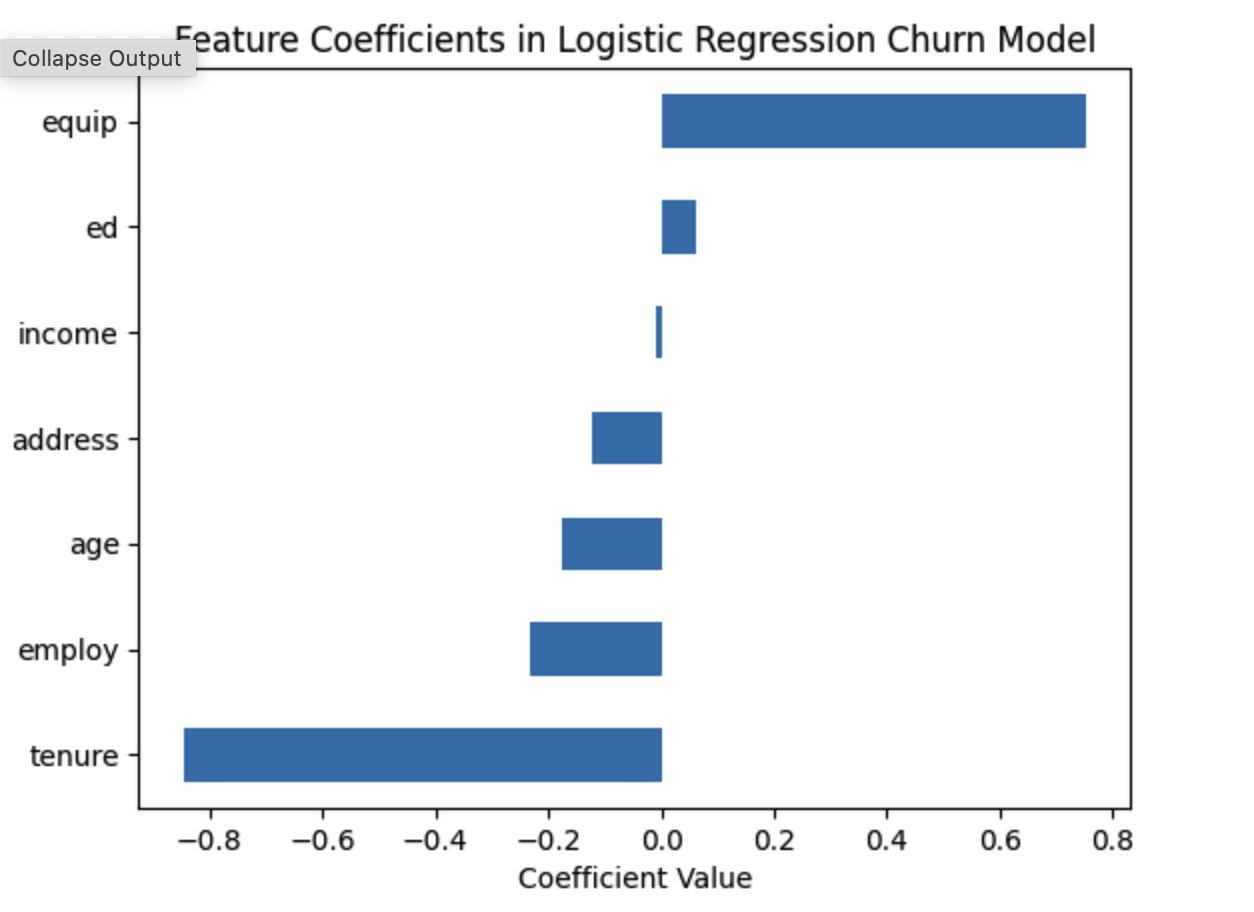

Large positive value of LR Coefficient for a given field indicates that increase in this parameter will lead to better chance of a positive, i.e. 1 class. A large negative value indicates the opposite, which means that an increase in this parameter will lead to poorer chance of a positive class. A lower absolute value indicates weaker affect of the change in that field on the predicted class. Let us examine this with the following exercises.  

## DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [ ]:
# import the Decision Tree Regression Model from scikit-learn
from sklearn.tree import DecisionTreeRegressor

# for reproducible output across multiple function calls, set random_state to a given integer value
dt_reg = DecisionTreeRegressor(criterion = 'squared_error',
                               max_depth=8, 
                               random_state=35)

## METRICS

https://scikit-learn.org/stable/api/sklearn.metrics.html

#### Model evaluation
You can compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics play a key role in the development of a model, as they provide insight into areas that require improvement.

There are different model evaluation metrics, let's use MSE here to calculate the accuracy of our model based on the test set: 
* Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just an average error.

* Mean Squared Error (MSE): MSE is the mean of the squared error. In fact, it's the metric used by the model to find the best fit line, and for that reason, it is also called the residual sum of squares.

* Root Mean Squared Error (RMSE). RMSE simply transforms the MSE into the same units as the variables being compared, which can make it easier to interpret.

* R-squared is not an error but rather a popular metric used to estimate the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

### For Linear Regression Model

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

print("Mean absolute error: %.2f" % mean_absolute_error(y_test_, y_test))
print("Mean squared error: %.2f" % mean_squared_error(y_test_, y_test))
print("Root mean squared error: %.2f" % root_mean_squared_error(y_test_, y_test))
print("R2-score: %.2f" % r2_score( y_test_, y_test) )

### For Logistic Regression Model ( Performance Evaluation )

Once the predictions have been generated, it becomes prudent to evaluate the performance of the model in predicting the target variable. Let us evaluate the log-loss value.

### log loss

Log loss (Logarithmic loss), also known as Binary Cross entropy loss, is a function that generates a loss value based on the class wise prediction probabilities and the actual class labels. The lower the log loss value, the better the model is considered to be.


In [ ]:
from sklearn.metrics import  log_loss
log_loss(y_test, yhat_prob)

In [ ]:
from sklearn.metrics import accuracy_score

In [4]:
from sklearn.metrics import mean_squared_error